In [1]:
import networkx as nx
from EoN import Gillespie_simple_contagion as gsp_alg
from collections import defaultdict
import pandas as pd
import argparse
from tqdm import trange
import numpy as np
from sim_function import run_stoc_sim
import matplotlib.pyplot as plt


In [2]:
G = nx.complete_graph(100)
G_name = 'CG'

# initial conditions
IC = defaultdict(lambda: 'V')
for node in range(1):
    IC[node] = 'B'
for node in range(2, 3):
    IC[node] = 'C'

params = {}

params['beta'] = 1.1
params['gammaP'] = 0.5
params['epsilon'] = 0.5
params['mu'] = 1

gammas = [0.001, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 2, 5, 100]
epsilons = [0.001, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 2, 5, 100]

n_iter=10

max_matrix = np.zeros((12,12))
final_matrix = np.zeros((12,12))
t_matrix = np.zeros((12,12))

for i, gamma in enumerate(gammas):
    for j, epsilon in enumerate(epsilons):
        params['gammaP'] = gamma
        params['epsilon'] = epsilon
        max_peack_black, final_black, t_window = run_stoc_sim(params, G, G_name, IC, n_iter)
        
        max_matrix[i][j] = np.median(max_peack_black)
        final_matrix[i][j] = np.median(final_black)
        t_matrix[i][j] = np.median(t_window)

100%|███████████████████████████████████████████| 10/10 [00:01<00:00,  5.65it/s]


array([[100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  98. ],
       [100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  97.5],
       [100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  99. ],
       [100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  98.5],
       [100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  97.5],
       [100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  98. ],
       [100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  99. ],
       [100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  98. ],
       [100. , 100. , 100. ,  99. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ,  99. ],
       [100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. 

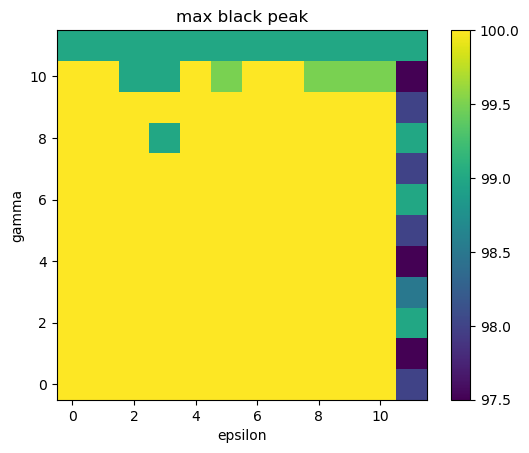

In [9]:
plt.imshow(max_matrix, origin='lower', cmap='viridis')
plt.ylabel('gamma')
plt.xlabel('epsilon')
plt.colorbar()
plt.title('max black peak')
max_matrix

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [99. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [99. , 99. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [99. , 99. , 49. , 99. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [99. , 99. , 99. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [99. , 99. , 99. ,  0. , 99. , 99. , 49.5,  0. , 99. , 99. ,  0. ,
         0. ],
       [99. , 99. , 99. , 99. , 99. ,  0. , 99. , 99. ,  0. ,  0. ,  0. ,
         0. ],
       [99. , 99. , 99. , 99. , 99. , 99. ,  0. ,  0. , 99. ,  0. ,  0. ,
         0. ],
       [99. , 99. , 99. , 99. , 99. , 99. , 99. , 49.5, 99. , 49.5,  0. ,
         0. ],
       [99. , 99. , 99. , 99. , 99. ,  0. ,  0. , 99. ,  0. ,  0. ,  0. ,
         0. ],
       [99. , 99. , 99. , 99. , 99. , 99. , 99. , 99. , 99. , 49.5,  0. ,
         0. ],
       [99. , 99. , 9

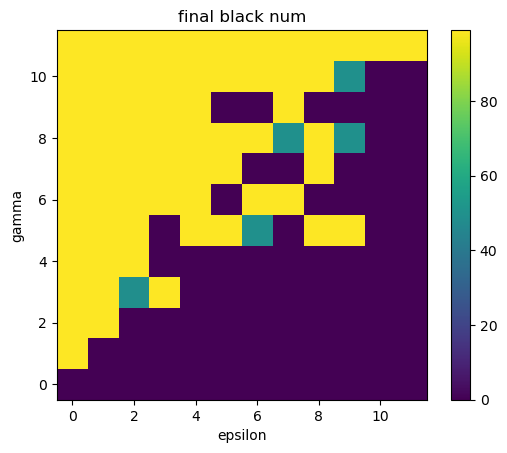

In [10]:
plt.imshow(final_matrix, origin='lower', cmap='viridis')
plt.ylabel('gamma')
plt.xlabel('epsilon')
plt.title('final black num')
plt.colorbar()
final_matrix

array([[5.24748130e+02, 4.69007453e+00, 1.61169307e+00, 2.15182961e+00,
        8.53692587e-01, 9.46797721e-01, 1.06397048e+00, 6.50308721e-01,
        8.29518492e-01, 6.47164271e-01, 2.49721211e-01, 2.11145504e-02],
       [2.83943031e+00, 1.36572153e+00, 1.31047893e+00, 1.46309721e+00,
        6.77437363e-01, 8.17936386e-01, 7.61780235e-01, 5.46390174e-01,
        5.62963824e-01, 5.32076916e-01, 2.55584841e-01, 3.13001329e-02],
       [2.05413241e+00, 1.62717174e+00, 1.01167053e+00, 6.77323608e-01,
        1.12086694e+00, 4.73403222e-01, 5.22789318e-01, 7.19996629e-01,
        4.07518356e-01, 3.06168908e-01, 2.46231371e-01, 3.22783350e-02],
       [2.40398445e+00, 1.61960937e+00, 5.55521268e-01, 4.86625831e-01,
        6.30962908e-01, 5.83699710e-01, 3.88803320e-01, 3.08431174e-01,
        6.58728647e-01, 4.57913585e-01, 2.92620086e-01, 1.46016019e-02],
       [7.12535700e-01, 4.92397869e-01, 5.29718920e-01, 7.02818957e-01,
        6.60736269e-01, 4.12129311e-01, 7.25308961e-01, 5.31

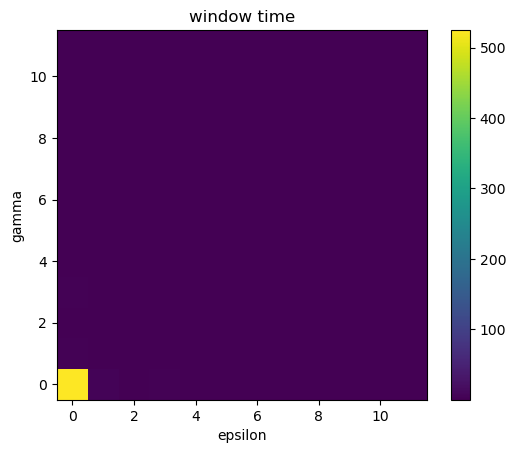

In [12]:
plt.imshow(t_matrix, origin='lower', cmap='viridis')
plt.ylabel('gamma')
plt.xlabel('epsilon')
plt.title('window time')
plt.colorbar()
t_matrix